**BANK CUSTOMER CHURN MODEL**

**Learning Objective**


    1. Data Encoding
    2. Feature Scaling
    3. Handling Imbalance Data
           * Random Under Sampling
           * Random Over Sampling
    4. Support Vector Machine Classifer
    5. Grid Search for Hyperparameter Tunning       



**Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

**Analyse Data**

In [ ]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  Num Of Products  Has Credit Card  Is Active Member  \
0       0.00                1                1                 1   
1   83807.86                1                0                 1   
2  159660.80                3                1                 0   
3       0.00                2                0                 0   
4  125510.82                1                1                 1   

   Estimated Salary  Churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df = df.set_index('CustomerId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Data Encoding**

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.replace({'Geography': {'France' : 2, 'Germany':1, 'Spain':0}}, inplace=True)

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.replace({'Gender':{'Male': 0, 'Female' :1}}, inplace=True)

In [ ]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [ ]:
df.replace({'Num Of Products': {1 : 0, 2:1, 3:1, 4:1}}, inplace=True)

In [ ]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [ ]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [ ]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [ ]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

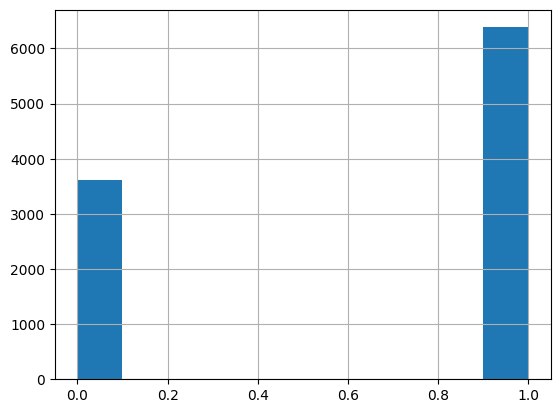

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

**Define Label and Features**


In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
x = df.drop(['Surname', 'Churn'], axis=1)

In [ ]:
y = df['Churn']

In [ ]:
x.shape, y.shape

((10000, 11), (10000,))

**Handling Imbalance Data**

Class Imbalance is a common problem in machine learning, especically in classification problems as machine learning algoritms are designed to maximize accuracy and reduce errors. If the data set is imbalance then in such cases, just by predicting the majority class we get a pretty high accuracy, but fails to capture the minority class, which is most often the point of creating the model in the first place, like in
   1. Fraud detection
   2. Spam filtering
   3. Diseases screening
   4. Online sales churn
   5. Advertising click-throughs

**Undersampling** can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data-think millions of rows.But a drawback to undersampling is that we are removing information that may be valuable.

In under-sampling, the simplest technique involves removing random records from the majority class,which can cause loss of information.

A drawback to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

**Oversampling** can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don't have a ton of data to work with.

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfiting.

In [ ]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

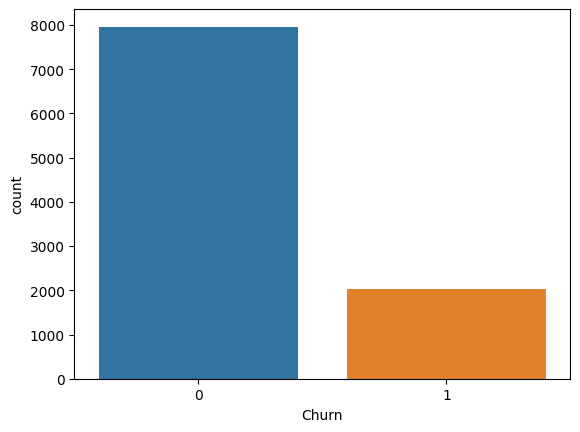

In [ ]:
sns.countplot(x= 'Churn', data = df);

In [ ]:
x.shape, y.shape

((10000, 11), (10000,))

**Random Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=2529)

In [ ]:
x_rus, y_rus = rus.fit_resample(x,y)

In [ ]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

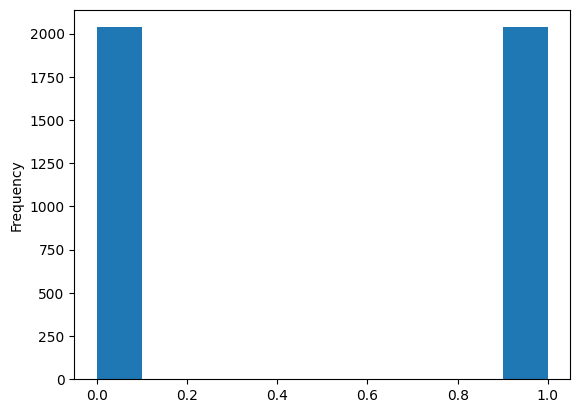

In [ ]:
y_rus.plot(kind = 'hist')

**Random Over Sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=2529)

In [ ]:
x_ros, y_ros = ros.fit_resample(x,y)

In [ ]:
x_ros.shape, y_ros.shape, x.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

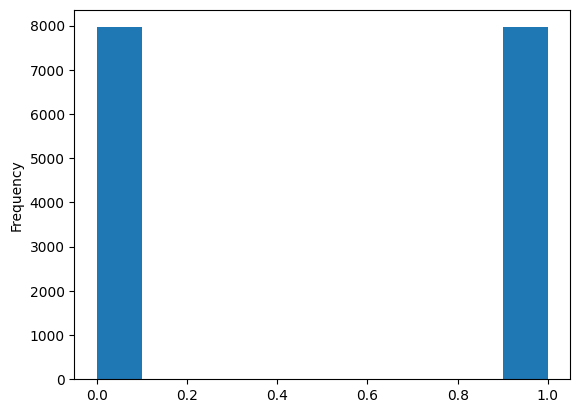

In [ ]:
y_ros.plot(kind = 'hist')

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

**Split Original Data**

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2529)

**Split Random Under Sample Data**

In [ ]:
x_train_rus, x_test_rus , y_train_rus, y_test_rus = train_test_split(x_rus,y_rus, test_size=0.3, random_state=2529)

**Split Random Over Sample Data**

In [ ]:
x_train_ros, x_test_ros , y_train_ros, y_test_ros = train_test_split(x_ros,y_ros, test_size=0.3, random_state=2529)

**Standarize Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

**Standarize Original Data**

In [ ]:
x_train[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_test[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Standarize Random Under Sample Data**

In [ ]:
x_train_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_test_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Standarize Random Over Sample Data**

In [ ]:
x_train_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_test_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Support Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = svc.predict(x_test)

**Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2381,   33],
       [ 436,  150]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'c' : [0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose=2, cv=2)
grid.fit(y_test , y_pred)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


ValueError: ignored

In [ ]:
print(grid.best_estimator_)